# **Entrega 1: Proyecto final**

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.tsa.api as smtsa
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from multiprocessing import Pool, cpu_count

In [4]:
data = pd.read_csv("C:/Users/fonta/OneDrive/Escritorio/data_2017_2022.csv", sep=";")

In [5]:
data.tail()

,fecha,estacion,variable,tipo,medicion
4084056,2022-12-31T23:59:59Z,era_obrero,velocidad_viento,val,"0,4000000000000000"
4084057,2022-12-31T23:59:59Z,canaveralejo,velocidad_viento,val,NaN
4084058,2022-12-31T23:59:59Z,canaveralejo,direccion_viento,val,NaN
4084059,2022-12-31T23:59:59Z,canaveralejo,lluvia,val,NaN
4084060,2022-12-31T23:59:59Z,canaveralejo,radiacion_solar,val,NaN


## **Análisis importantes**

In [6]:
data.shape

(4084061, 5)

Nuestro dataset cuenta con 4.084.061 de registros inicialmente, pero luego de unos procesos estos registros se reducirán.Estos registros fueron tomados desde diferentes bases de medición y observados en el tiempo.

In [7]:
data.fecha.unique()

array(['2017-01-01T00:59:59Z', '2017-01-01T01:59:59Z',
       '2017-01-01T02:59:59Z', ..., '2022-12-31T21:59:59Z',
       '2022-12-31T22:59:59Z', '2022-12-31T23:59:59Z'], dtype=object)

Como primer análisis de nuestro conjunto de datos, vemos que se tienen registros desde el año 2017 hasta 2022, estos registros estan tomados por cada hora de cada día durante estos 6 años.

In [8]:
data.estacion.unique()

array(['base_aerea', 'compartir', 'univalle', 'canaveralejo', 'ermita',
       'era_obrero', 'flora', 'pance', 'transitoria'], dtype=object)

Se tienen en total 9 estaciones desde donde tomaron las observaciones.
1. Base Aerea
2. Compartir
3. Univalle
4. Canaveralejo
5. Ermita
6. Era Obrero
7. Flora
8. Pance
9. Transitoria

In [9]:
data.variable.unique()

array(['pm25', 'so2', 'lluvia', 'o3', 'temperatura', 'pm10', 'humedad',
       'velocidad_viento', 'direccion_viento', 'radiacion_solar',
       'presion', 'no2', 'uv-pm', 'black_carbon', 'h2s',
       'temperatura_10_m'], dtype=object)

Nuestro dataset tiene un total de 16 variables, pero recordemos que el interés de este proyecto es predecir la comtamicación por la particula del Pm10, así que mas adelante trabajaremos solo con los registros correspondientes de esta variable.

Este dataset viene organizado de una manera no tan adecuada para su estudio, es por eso que es necesario hacer un pivotado, con el fin de poder tener acceso mejor a los datos de interés.

## **Pivotado completo del data set**

In [10]:
data1=data.pivot(index=['fecha', 'estacion'],columns='variable',values='medicion')

In [11]:
data1= data1.reset_index()
data1.head(10)

variable,fecha,estacion,black_carbon,direccion_viento,h2s,humedad,lluvia,no2,o3,pm10,pm25,presion,radiacion_solar,so2,temperatura,temperatura_10_m,uv-pm,velocidad_viento
0,2017-01-01T00:59:59Z,base_aerea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01T00:59:59Z,canaveralejo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"51,7000000000000028",NaN,NaN,NaN,"0,3142645629907114",NaN,NaN,NaN,NaN
2,2017-01-01T00:59:59Z,compartir,NaN,"208,5999999999999943",NaN,"75,9000000000000057","0,0000000000000000",NaN,"8,4562520617694883","221,0000000000000000","161,0000000000000000","680,5000000000000000","0,0000000000000000",NaN,"25,3000000000000007",NaN,NaN,"1,3999999999999999"
3,2017-01-01T00:59:59Z,era_obrero,NaN,NaN,NaN,NaN,"0,0000000000000000",NaN,"16,1473212223579807","195,8000000000000114",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01T00:59:59Z,ermita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"61,8999999999999986",NaN,NaN,NaN,"2,1474745137698608",NaN,NaN,NaN,NaN
5,2017-01-01T00:59:59Z,flora,NaN,NaN,NaN,NaN,"0,0000000000000000",NaN,"8,5347323593265134","17,6999999999999993",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-01-01T00:59:59Z,pance,NaN,"296,3000000000000114",NaN,"89,5999999999999943","0,0000000000000000",NaN,"3,4138929437306058","50,0000000000000000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,1000000000000000"
7,2017-01-01T00:59:59Z,transitoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"91,0000000000000000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017-01-01T00:59:59Z,univalle,NaN,NaN,NaN,NaN,NaN,NaN,"7,3575278959711330",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2017-01-01T01:59:59Z,base_aerea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data1.shape

(473256, 18)

Luego de los procesos anteriores vemos que ahora tenemos un nuvo dataset esta vez con las variables adecuadas con si respectiva medición, con esto se cuenta con un conjunto final de 473.256 registros.

In [13]:
missing_data = data1.isna().sum()
print(missing_data)

variable
fecha                    0
estacion                 0
black_carbon        464636
direccion_viento    268837
h2s                 457903
humedad             242369
lluvia              212585
no2                 473255
o3                  271320
pm10                238688
pm25                298710
presion             264075
radiacion_solar     251972
so2                 341076
temperatura         206050
temperatura_10_m    459510
uv-pm               464636
velocidad_viento    267851
dtype: int64


Según lo anterior vemos cuantos valores faltantes por cada variable, en este caso es de nuestro interés solo la variable PM10, que en esta caso cuenta con 238.688 registros faltantes.

Es importante ajustar el formato de algunas de las variables por ejemplo la fecha, a continuación se ajusta el formato.

In [14]:
data1['fecha'] = pd.to_datetime(data1['fecha'], utc=True)
data1['fecha']

0        2017-01-01 00:59:59+00:00
1        2017-01-01 00:59:59+00:00
2        2017-01-01 00:59:59+00:00
3        2017-01-01 00:59:59+00:00
4        2017-01-01 00:59:59+00:00
                    ...           
473251   2022-12-31 23:59:59+00:00
473252   2022-12-31 23:59:59+00:00
473253   2022-12-31 23:59:59+00:00
473254   2022-12-31 23:59:59+00:00
473255   2022-12-31 23:59:59+00:00
Name: fecha, Length: 473256, dtype: datetime64[ns, UTC]

A continuación debemos ajustar los caracteres de puntuación en la variable de interés.

In [15]:
data1['pm10'] = data1['pm10'].str.replace(',', '.', regex=False)
data1['pm10']= pd.to_numeric(data1['pm10'], errors='coerce')
data1['pm10']

0           NaN
1          51.7
2         221.0
3         195.8
4          61.9
          ...  
473251      NaN
473252      NaN
473253      NaN
473254      NaN
473255      NaN
Name: pm10, Length: 473256, dtype: float64

Puesto que la cantidad de datos faltantes es muy grande y con el fin de hacer un estudio de manera específica, se harán unos filtros por cada estación y se trabajará para este proyecto la estación que tenga menos datos faltantes.

## **Filtro por estación**

In [16]:
baseaerea = data1[(data1["estacion"]=="base_aerea") ]
compartir = data1[(data1["estacion"]=="compartir") ]
univalle =  data1[(data1["estacion"]=="univalle") ]
canaveralejo = data1[(data1["estacion"]=="canaveralejo") ]
ermita = data1[(data1["estacion"]=="ermita") ]
eraobrero = data1[(data1["estacion"]=="era_obrero") ]
flora = data1[(data1["estacion"]=="flora") ]
pance = data1[(data1["estacion"]=="pance") ]
transitoria = data1[(data1["estacion"]=="transitoria") ]

In [17]:
baseaerea_na = baseaerea["pm10"].isna().sum()
compartir_na = compartir["pm10"].isna().sum()
univalle_na = univalle["pm10"].isna().sum()
canaveralejo_na = canaveralejo["pm10"].isna().sum()
ermita_na = ermita["pm10"].isna().sum()
eraobrero_na = eraobrero["pm10"].isna().sum()
flora_na = flora["pm10"].isna().sum()
pance_na = pance["pm10"].isna().sum()
transitoria_na = transitoria["pm10"].isna().sum()

values_pm10=[baseaerea_na,compartir_na,univalle_na,canaveralejo_na,ermita_na,eraobrero_na,flora_na,pance_na,transitoria_na]
values_pm10=sorted(values_pm10)
print(values_pm10)
print('')
print("NA en pm10 para base_aerea:", baseaerea_na)
print("NA en pm10 para base_aerea:", compartir_na)
print("NA en pm10 para univalle:", univalle_na)
print("NA en pm10 para canaveralejo:", canaveralejo_na)
print("NA en pm10 para ermita:", ermita_na)
print("NA en pm10 para era_obrero:", eraobrero_na)
print("NA en pm10 para flora:", flora_na)
print("NA en pm10 para base_aerea:", pance_na)
print("NA en pm10 para transitoria:", transitoria_na)



[13410, 14301, 16819, 16986, 17459, 21497, 40761, 44871, 52584]

NA en pm10 para base_aerea: 52584
NA en pm10 para base_aerea: 14301
NA en pm10 para univalle: 40761
NA en pm10 para canaveralejo: 21497
NA en pm10 para ermita: 13410
NA en pm10 para era_obrero: 17459
NA en pm10 para flora: 16986
NA en pm10 para base_aerea: 16819
NA en pm10 para transitoria: 44871


Al hacer los respectivos filtros y cuentas vemos que la estación con menos valores faltantes es la estación de ERMITA así que de ahora en adelante se trabajará solo con esta base de datos.

## **Ermita**

In [18]:
ermita.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52584 entries, 4 to 473251
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   fecha             52584 non-null  datetime64[ns, UTC]
 1   estacion          52584 non-null  object             
 2   black_carbon      0 non-null      object             
 3   direccion_viento  0 non-null      object             
 4   h2s               0 non-null      object             
 5   humedad           26997 non-null  object             
 6   lluvia            0 non-null      object             
 7   no2               0 non-null      object             
 8   o3                0 non-null      object             
 9   pm10              39174 non-null  float64            
 10  pm25              13878 non-null  object             
 11  presion           22874 non-null  object             
 12  radiacion_solar   0 non-null      object             
 13  so2  

In [19]:
len(ermita)

52584

A partir de lo anterior tenemos que la base de datos de la estación de **Ermita** cuenta con 52.584 registros de los cuales la variable PM10 tiene 39.174 no nulos.

Se creará un dataset con solo nuestras variables de interés que son la fecha y la medición del PM10.

### **Serie de tiempo de PM10 en la estación ermita**

In [20]:
serie_pm10= ermita[['fecha', 'pm10']].reset_index()

In [21]:
serie_pm10.drop(columns=['index'],inplace=True)
serie_pm10

variable,fecha,pm10
0,2017-01-01 00:59:59+00:00,61.9
1,2017-01-01 01:59:59+00:00,101.0
2,2017-01-01 02:59:59+00:00,75.6
3,2017-01-01 03:59:59+00:00,56.3
4,2017-01-01 04:59:59+00:00,107.1
...,...,...
52579,2022-12-31 19:59:59+00:00,NaN
52580,2022-12-31 20:59:59+00:00,NaN
52581,2022-12-31 21:59:59+00:00,NaN
52582,2022-12-31 22:59:59+00:00,NaN


Intentemos graficar la serie de tiempo para la estación ermita.

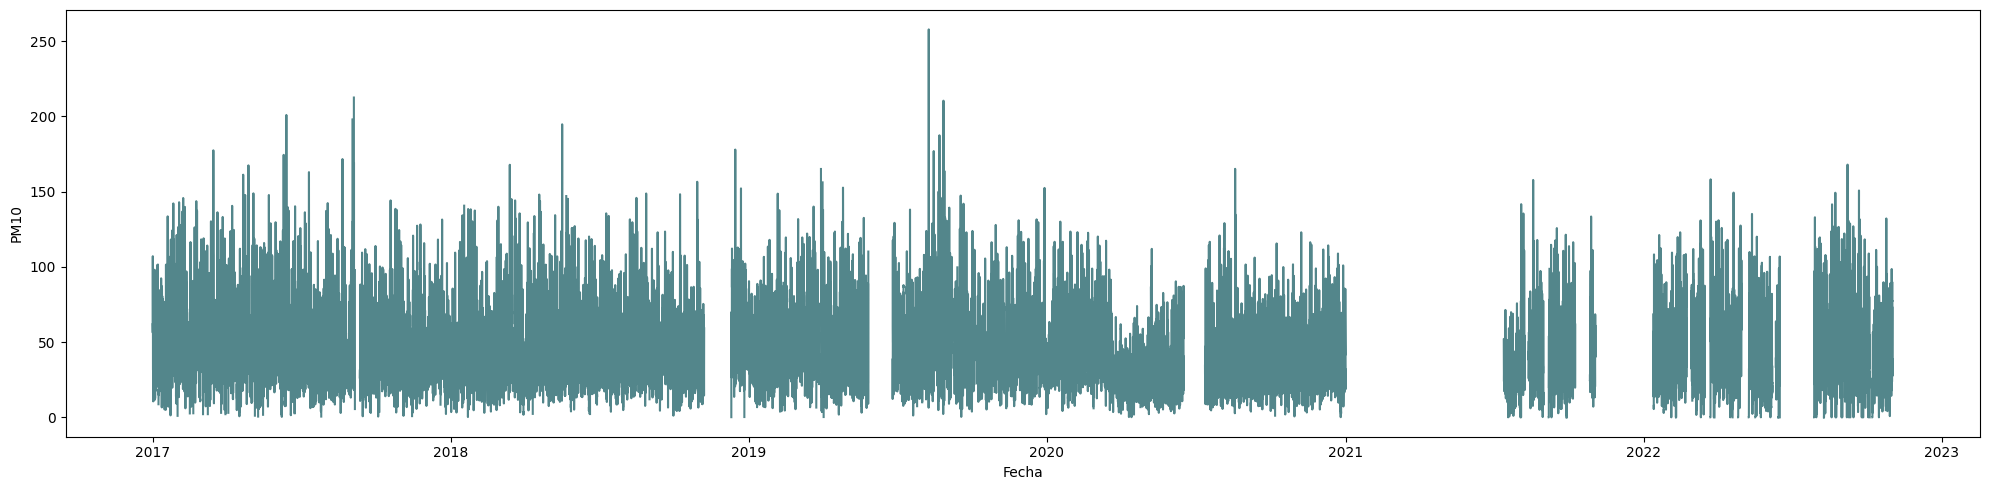

In [22]:
plt.figure(figsize=(20, 5))
plt.plot(serie_pm10['fecha'], serie_pm10['pm10'], color='#53868B',  linestyle='-', markersize=5)
plt.xlabel('Fecha')
plt.ylabel('PM10')
plt.tight_layout()
plt.show()

Al ver la gráfica de la serie de tiempo no se diferencia mucho lo que es la tendencia o el patrón de la serie de tiempo, pero lo que si podemos distinguir claramente son esos registros nulos, podemos ver que la mayor cantidad de datos faltantes se encuentran en el año 2021, con esta imagen podemos ir pensando en como se hará la imputación de estos datos faltantes.

Veamos la proporción de datos faltantes en la serie de tiempo.

In [23]:
print("Los valores faltantes del Pm10 en la estación ermita son en total: ",ermita_na)
print("Proporción de los valores faltantes: ", ermita_na/len(ermita))

Los valores faltantes del Pm10 en la estación ermita son en total:  13410
Proporción de los valores faltantes:  0.25502053856686446


Como muestra la gráfica de la serie y como comentamos anteriormente, la mayoria de los datos faltantes estan a partir de 2021, por esta razón se hará el análisis e imputación de los datos faltantes dividiendo el dataset con el fin de crear dos meodelos que se ajusten al comportamiento de los datos

### **Serie de tiempo 2017-2019**

A continuación se crea la serie de tiempo del pm10 en el periodo de 2017 a 2019.

In [24]:
ermita17_19=ermita[ermita['fecha'].dt.year <=2019]

In [25]:
serie_pm10= ermita17_19[['fecha', 'pm10']].reset_index()
serie_pm10.drop(columns=['index'],inplace=True)
serie_pm10

variable,fecha,pm10
0,2017-01-01 00:59:59+00:00,61.9
1,2017-01-01 01:59:59+00:00,101.0
2,2017-01-01 02:59:59+00:00,75.6
3,2017-01-01 03:59:59+00:00,56.3
4,2017-01-01 04:59:59+00:00,107.1
...,...,...
26275,2019-12-31 19:59:59+00:00,38.3
26276,2019-12-31 20:59:59+00:00,37.3
26277,2019-12-31 21:59:59+00:00,40.0
26278,2019-12-31 22:59:59+00:00,28.9


Veamos como es el comportamiento de la serie con los siguientes análisis.

#### **Comportamiento de la serie**

Inicialmente omitimos los valores NaN.

In [26]:
serie_pm10_wna= ermita17_19[['fecha', 'pm10']].dropna(subset=['pm10']).reset_index(drop=True)
serie_pm10_wna

variable,fecha,pm10
0,2017-01-01 00:59:59+00:00,61.9
1,2017-01-01 01:59:59+00:00,101.0
2,2017-01-01 02:59:59+00:00,75.6
3,2017-01-01 03:59:59+00:00,56.3
4,2017-01-01 04:59:59+00:00,107.1
...,...,...
24023,2019-12-31 19:59:59+00:00,38.3
24024,2019-12-31 20:59:59+00:00,37.3
24025,2019-12-31 21:59:59+00:00,40.0
24026,2019-12-31 22:59:59+00:00,28.9


Como bien es sabido es importante en el estudio de las series de tiempo verificar como es su gráfico de autocorrelación, el cual muestra la correlación que tiene un registros con sus registros en el pasado, veamos.

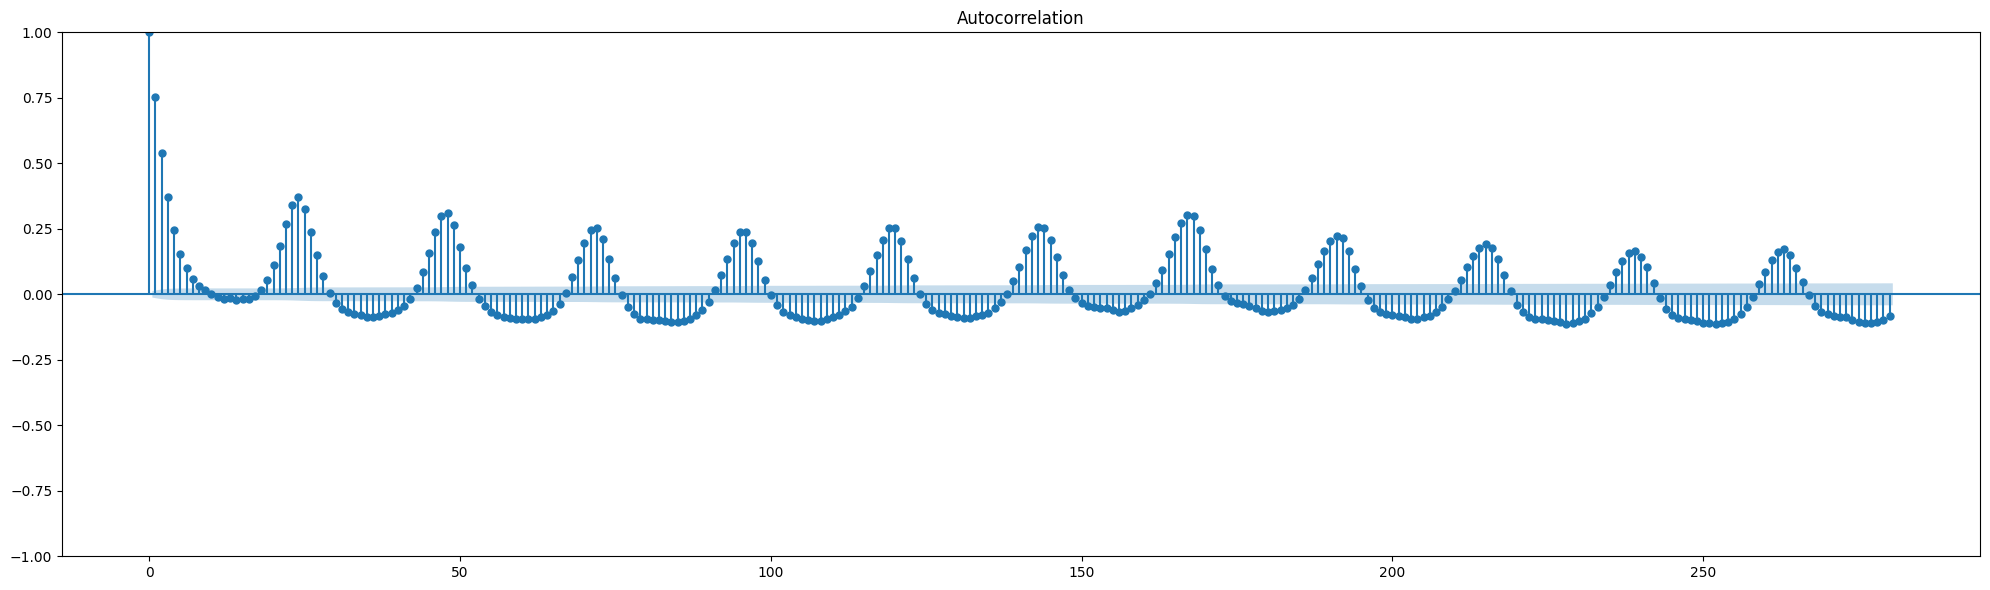

In [27]:
plt.rcParams.update({'figure.figsize': (20, 6)})
plot_acf(serie_pm10_wna["pm10"], lags=280)
plt.tight_layout()
plt.show()

Si analisamos el gráfico de autocorrelación vemos que existe un patrón entre las correlaciones de los valores anteriores de la serie, esto es un indicio para pensar en que estamos trabajando con una serie estacionaria o incluso cíclica, vemos que los dos primeros valores de autocorrelación son cernas a 1, es decir que hay una dependencia secuencial en los datos.

Es importante notar que a medida que aumentan los lags la correlacion va disminuyendo.

Así mismo como se estudia la autocorrelación, tambien es importante estudiar el gráfico de autocorrelación parcial, el cual muestra la correlación que tiene un registros con lo observado antes en el pasado eliminando la influencia de los registros intermedios.

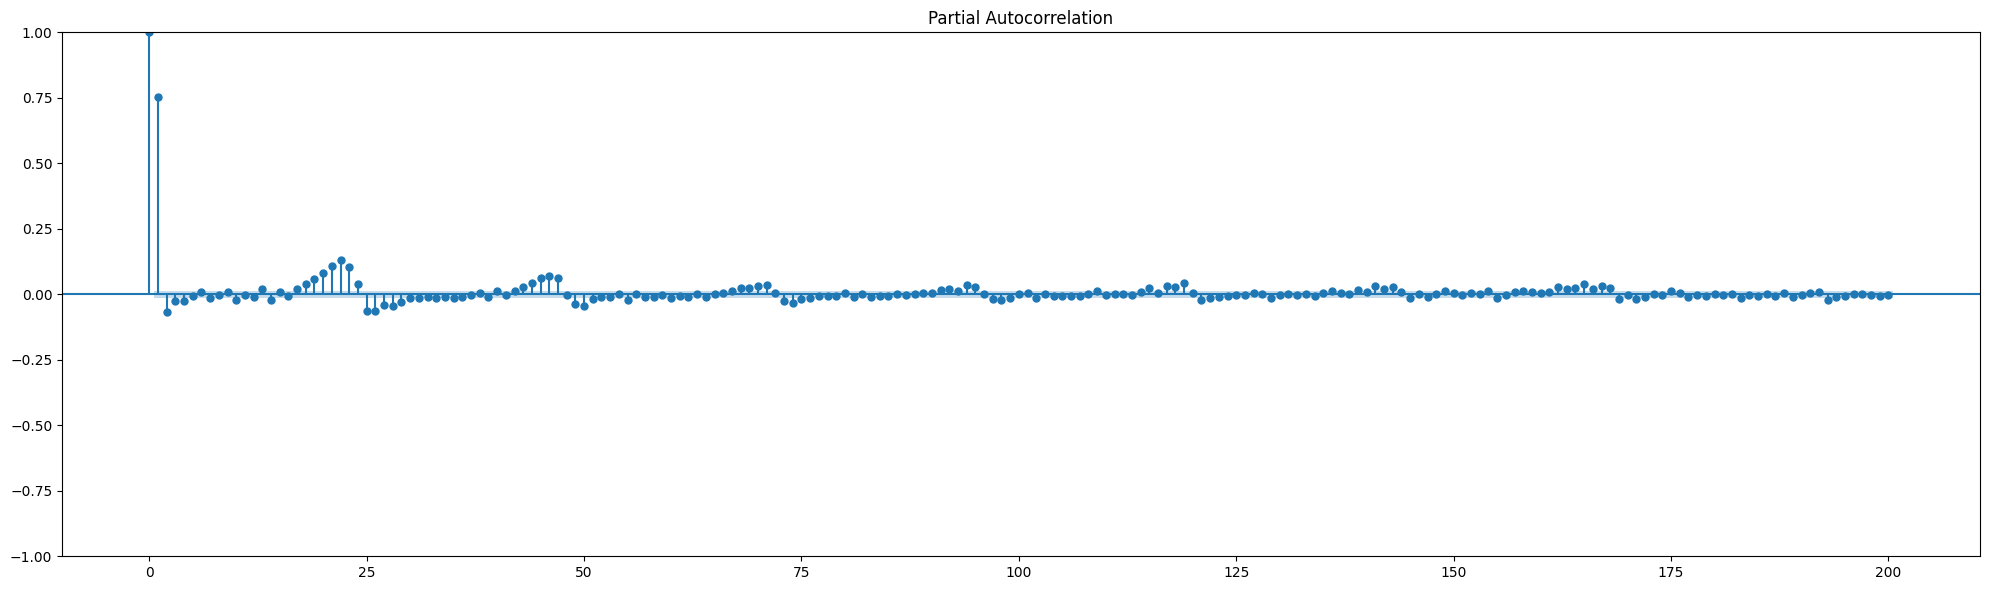

In [28]:
plt.rcParams.update({'figure.figsize': (20, 6)})
plot_pacf(serie_pm10_wna["pm10"], lags=200)
plt.tight_layout()
plt.show()

Por parte del gráfico de autocorrelación parcial vemos un cambio abrupto entre las primeras correlaciones, indicando así que cada observación esta fuertemente influenciada por la observacioón inmediata anterior a diferencia de las observaciones mas distantes en el pasado.

Se realizará la prueba de **Duckey-Fuller** aumentada para probar de forma analítica que la serie es estacionaria.

In [29]:
result = adfuller(serie_pm10_wna["pm10"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -15.342534
p-value: 0.000000


Si recordamos la hipotesis nula de la prueba de Duckey-Fuller, esta se plantea como $$H_0= \textit{La serie no es estacionaria}$$ Con un p-valore = 0 se rechaza la hipotesis nula para cualquier nivel de significacia, por tanto se prueba que la serie es estacionaria.

Puesto que se confirma que la serie de tiempo es estacionaria, se implementarán uno de los modelos clásicos de las series de tiempo para hacer la imputación de los datos faltantes en este caso se hará uso de un modelo ARIMA o mejor dicho un modelo ARMA puesto que la serie ya es estacionaria, a continuación se presentan la hiperparametrización del modelo y mas adelante la predicción de los datos faltantes.

#### **Modelo ARMA para la imputación de datos faltantes.**

Se hará una busqueda de los mejores parametros para nuestro modelo arma:

In [30]:
aicVal=[]

for ari in range(1, 3):
    for maj in range(1,3):
        arma_obj = smtsa.ARIMA(serie_pm10_wna["pm10"].tolist(), order=(ari, 0, maj)).fit()
        aicVal.append([ari, maj, arma_obj.aic])

In [31]:
dfAIC = pd.DataFrame(aicVal, columns=['AR(p)', 'MA(q)', 'AIC'])
dfAIC

,AR(p),MA(q),AIC
0,1,1,199288.621318
1,1,2,199275.645535
2,2,1,199258.876717
3,2,2,199259.913104


Luego de hacer lo que se podría llamar un GridSearch para los parametros del modelo ARMA, se creó un data set donde se registran los scores de cada uno de los modelos con las diferentes combinaciones de parametros. Este proceso arrojó los siguientes resultados.

In [32]:
dfAIC.nsmallest(n=1, columns="AIC")

,AR(p),MA(q),AIC
2,2,1,199258.876717


Vemos que al hacer la busqueda de los mejores parametros el proceso arroja como mejores parametros $p=2$ y $q=1$ es decir que el modelo que mejor se ajusta a los datos de la base de Ermita es ARMA(2,1).

**Implementación de la imputación:**

Primeramente necesitamos el df que se querrá imputar, es decir la serie con los valores falatantes.

In [33]:
to_imp=serie_pm10.copy()
to_imp

variable,fecha,pm10
0,2017-01-01 00:59:59+00:00,61.9
1,2017-01-01 01:59:59+00:00,101.0
2,2017-01-01 02:59:59+00:00,75.6
3,2017-01-01 03:59:59+00:00,56.3
4,2017-01-01 04:59:59+00:00,107.1
...,...,...
26275,2019-12-31 19:59:59+00:00,38.3
26276,2019-12-31 20:59:59+00:00,37.3
26277,2019-12-31 21:59:59+00:00,40.0
26278,2019-12-31 22:59:59+00:00,28.9


Cantidad de valores a imputar.

In [34]:
to_imp["pm10"].isna().sum()

2252

Vemos que se busca imputar 2.252 observaciones.

Por otro lado se necesita la serie sin los NaN para poder entrenar el modelo ARMA y posteriormente usar las predicciones del modelo para imputar los datos faltantes.

In [35]:
entrenamiento=serie_pm10_wna.copy()
entrenamiento

variable,fecha,pm10
0,2017-01-01 00:59:59+00:00,61.9
1,2017-01-01 01:59:59+00:00,101.0
2,2017-01-01 02:59:59+00:00,75.6
3,2017-01-01 03:59:59+00:00,56.3
4,2017-01-01 04:59:59+00:00,107.1
...,...,...
24023,2019-12-31 19:59:59+00:00,38.3
24024,2019-12-31 20:59:59+00:00,37.3
24025,2019-12-31 21:59:59+00:00,40.0
24026,2019-12-31 22:59:59+00:00,28.9


Vemos que se usarán 24.028 observaciones para entrenar el modelo que nos ayudará a predecir los datos faltantes.

Se necesita de igual forma los indices donde se encuentran los valore faltantes con el fin de rellenarlos con las predicciones del modelo.

In [36]:
missing_indices = to_imp[to_imp['pm10'].isnull()].index
print(len(missing_indices))
missing_indices

2252


Index([  168,   169,   170,   730,   731,  1021,  1046,  1047,  1048,  1049,
       ...
       24224, 24742, 24947, 24948, 24949, 25427, 25428, 25429, 25760, 25761],
      dtype='int64', length=2252)

#### **Ajuste del modelo**

En el paso siguiente se hará el entrenamiento del modelo con los parametros escogidos anteriormente, luego se haran las predicciónes y se extraerán los valores en los indices donde se encuentran los valores faltantes.

In [37]:
arma_obj_finp = smtsa.ARIMA(entrenamiento["pm10"].tolist(), order=(2, 0, 1)).fit()

predicciones = arma_obj_finp.predict(start=0, end=len(to_imp) - 1)

for idx in missing_indices:
    to_imp.at[idx, 'pm10'] = predicciones[idx]

Rectifiquemos que se haya hecho la imputación de forma correcta.

In [38]:
to_imp["pm10"].isna().sum()

0

Recordemos como se veía la serie con los valores faltantes a continuación.

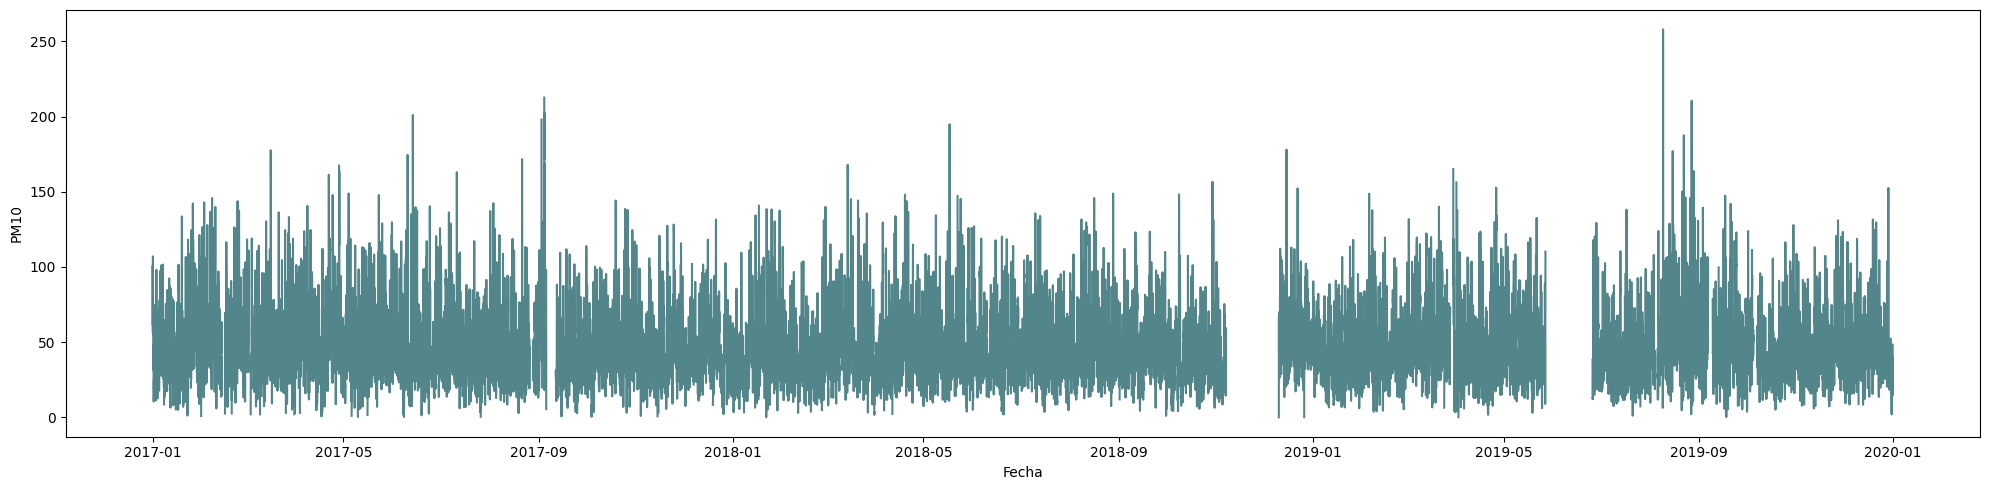

In [39]:
plt.figure(figsize=(20, 5))
plt.plot(serie_pm10['fecha'], serie_pm10['pm10'], color='#53868B',  linestyle='-', markersize=5)
plt.xlabel('Fecha')
plt.ylabel('PM10')
plt.tight_layout()
plt.show()

Y ahora veamos como se ve la serie con los valores imputados.

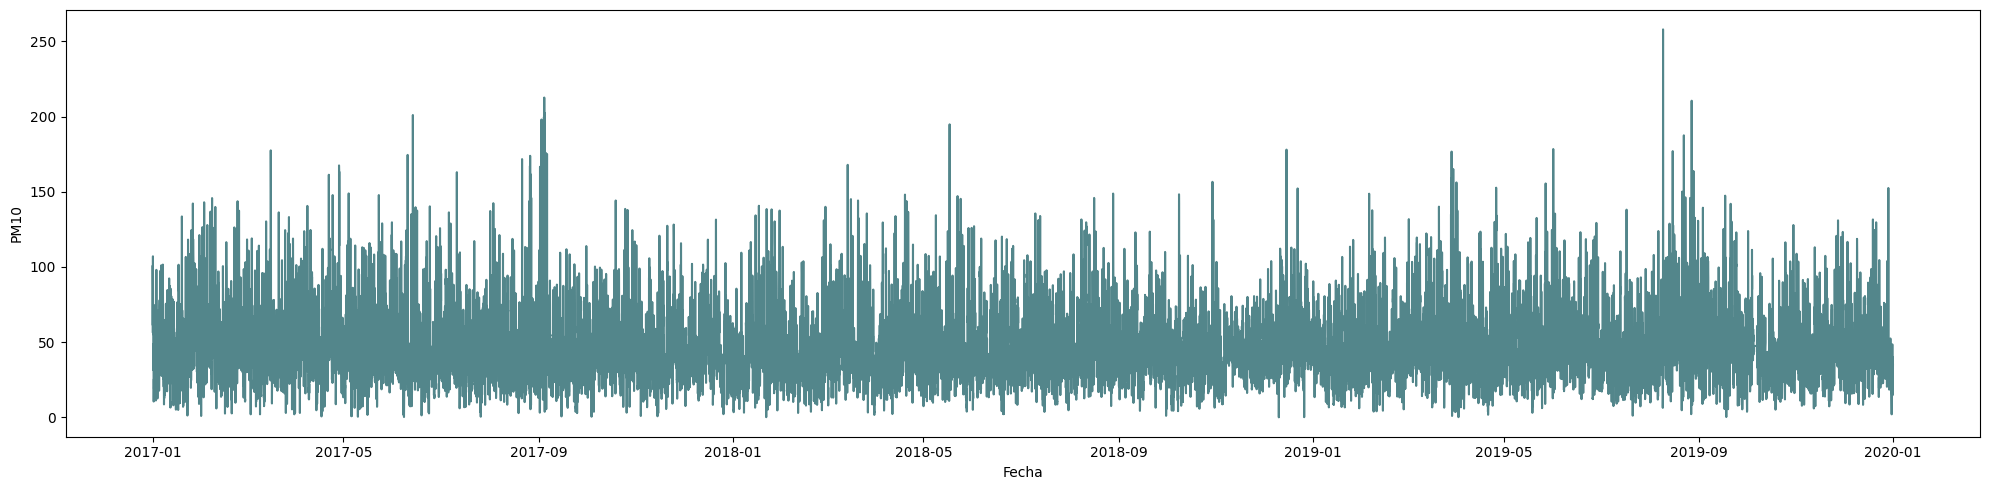

In [40]:
plt.figure(figsize=(20, 5))
plt.plot(to_imp['fecha'], to_imp['pm10'], color='#53868B',  linestyle='-', markersize=5)
plt.xlabel('Fecha')
plt.ylabel('PM10')
plt.tight_layout()
plt.show()

Con el gráfico anterior vemos que la imputación se hizo de forma correcta aparentemente, revisemos los supuestos del modelo para confirmar de manera analítica como se comportó el modelo.

#### **Revisión de supuestos**

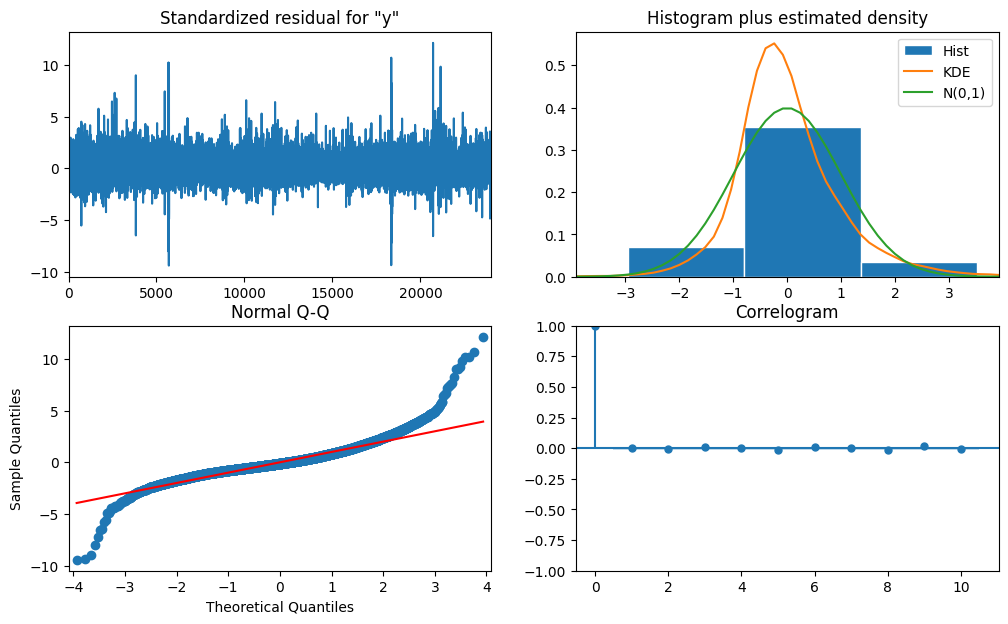

In [41]:
arma_obj_finp.plot_diagnostics(figsize=(12,7))
plt.show()

 Los residuos, que representan las diferencias entre los valores observados y los predichos por el modelo, no presentan patrones claros de autocorrelación y su varianza parece ser constante a lo largo del tiempo. Estos hallazgos sugieren que los residuos son esencialmente ruido aleatorio, ademas si notamos el histrograma  y el QQ plot, parece ser que los residuos se distribuyen normales y no guardan una correlación entre ellos.

Ahora veamos que pasa en la serie de tiempo a partir del 2022.

### **Serie de tiempo 2020-2022**

In [42]:
ermita20_22=ermita[ermita['fecha'].dt.year >=2020]

In [43]:
serie_pm10= ermita20_22[['fecha', 'pm10']].reset_index()
serie_pm10.drop(columns=['index'],inplace=True)
serie_pm10

variable,fecha,pm10
0,2020-01-01 00:59:59+00:00,NaN
1,2020-01-01 01:59:59+00:00,NaN
2,2020-01-01 02:59:59+00:00,NaN
3,2020-01-01 03:59:59+00:00,NaN
4,2020-01-01 04:59:59+00:00,NaN
...,...,...
26299,2022-12-31 19:59:59+00:00,NaN
26300,2022-12-31 20:59:59+00:00,NaN
26301,2022-12-31 21:59:59+00:00,NaN
26302,2022-12-31 22:59:59+00:00,NaN


Recordemos al inicio del estudio de la serie de tiempo que mencionamos que a partir del 2020 esta la mayor cantidad de datos faltantes.

#### **Comportamiento de la serie**

Iniciamos omitiendo los NaN para el estudio de los aspectos importantes de la serie.

In [44]:
serie_pm10_wna= ermita20_22[['fecha', 'pm10']].dropna(subset=['pm10']).reset_index(drop=True)
serie_pm10_wna

variable,fecha,pm10
0,2020-01-01 10:59:59+00:00,13.8
1,2020-01-01 11:59:59+00:00,9.4
2,2020-01-01 12:59:59+00:00,11.5
3,2020-01-01 13:59:59+00:00,15.1
4,2020-01-01 14:59:59+00:00,19.6
...,...,...
15141,2022-11-01 05:59:59+00:00,57.7
15142,2022-11-01 06:59:59+00:00,77.5
15143,2022-11-01 07:59:59+00:00,77.2
15144,2022-11-01 08:59:59+00:00,89.4


Vemos que el total de los valores en la serie desde 2020 que no son faltantes 15.146 es decir que mas de la mitad de los datos son faltantes.

Pasemos a revisar el gráfico de autocorrelación.

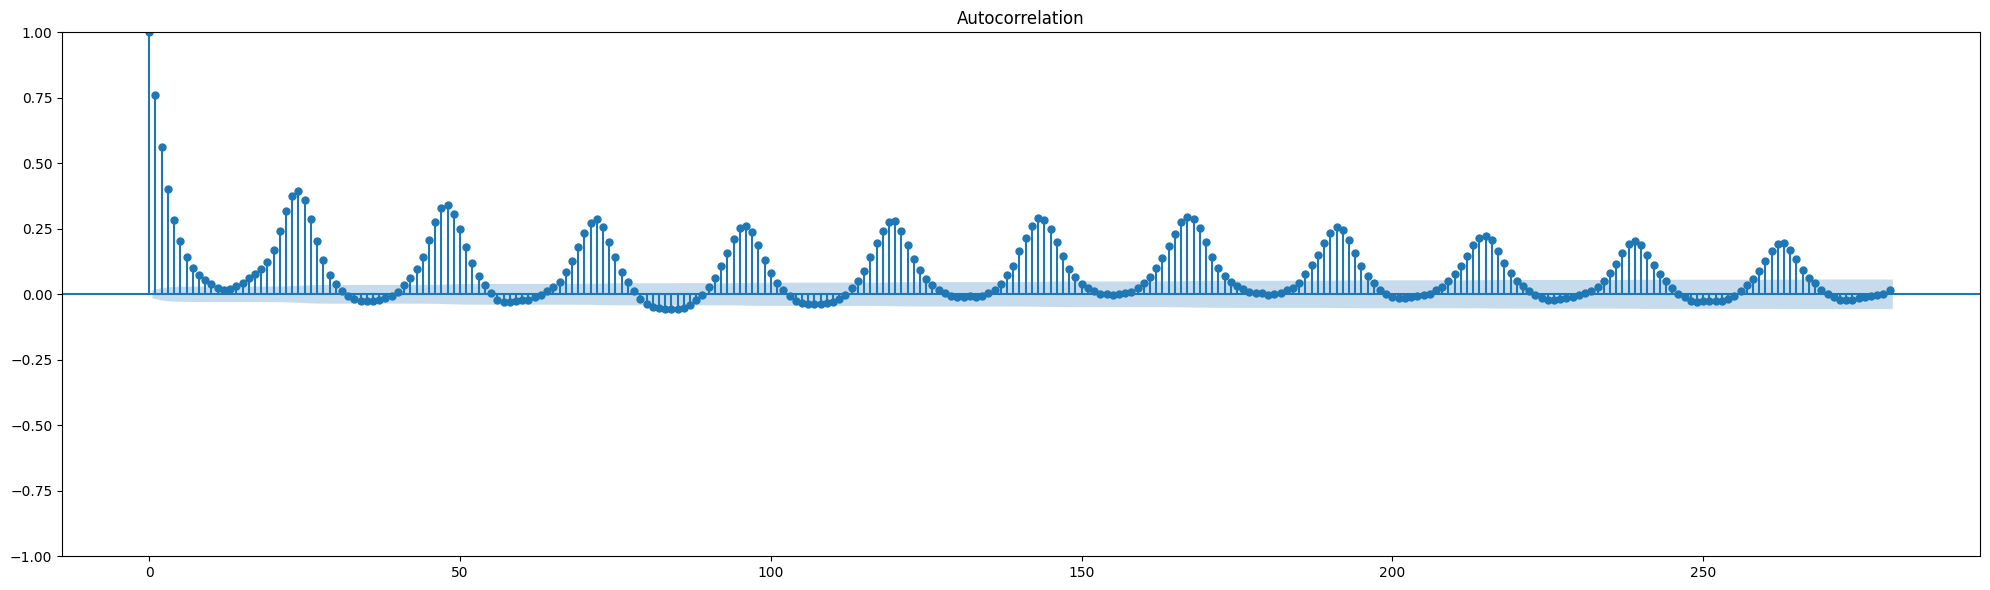

In [45]:
plt.rcParams.update({'figure.figsize': (20, 6)})
plot_acf(serie_pm10_wna["pm10"], lags=280)
plt.tight_layout()
plt.show()

Vemos que el gráfico de autocorrelacion de esta parte de la serie es muy similar, muestra de igual forma un patron de correlaciones, lo que nos lleva a pensar a que de igual forma esta serie es estacionaria, es importante tambien notar que a medida que nos dezplazamos en el pasado las correlaciones van disminuyendo.

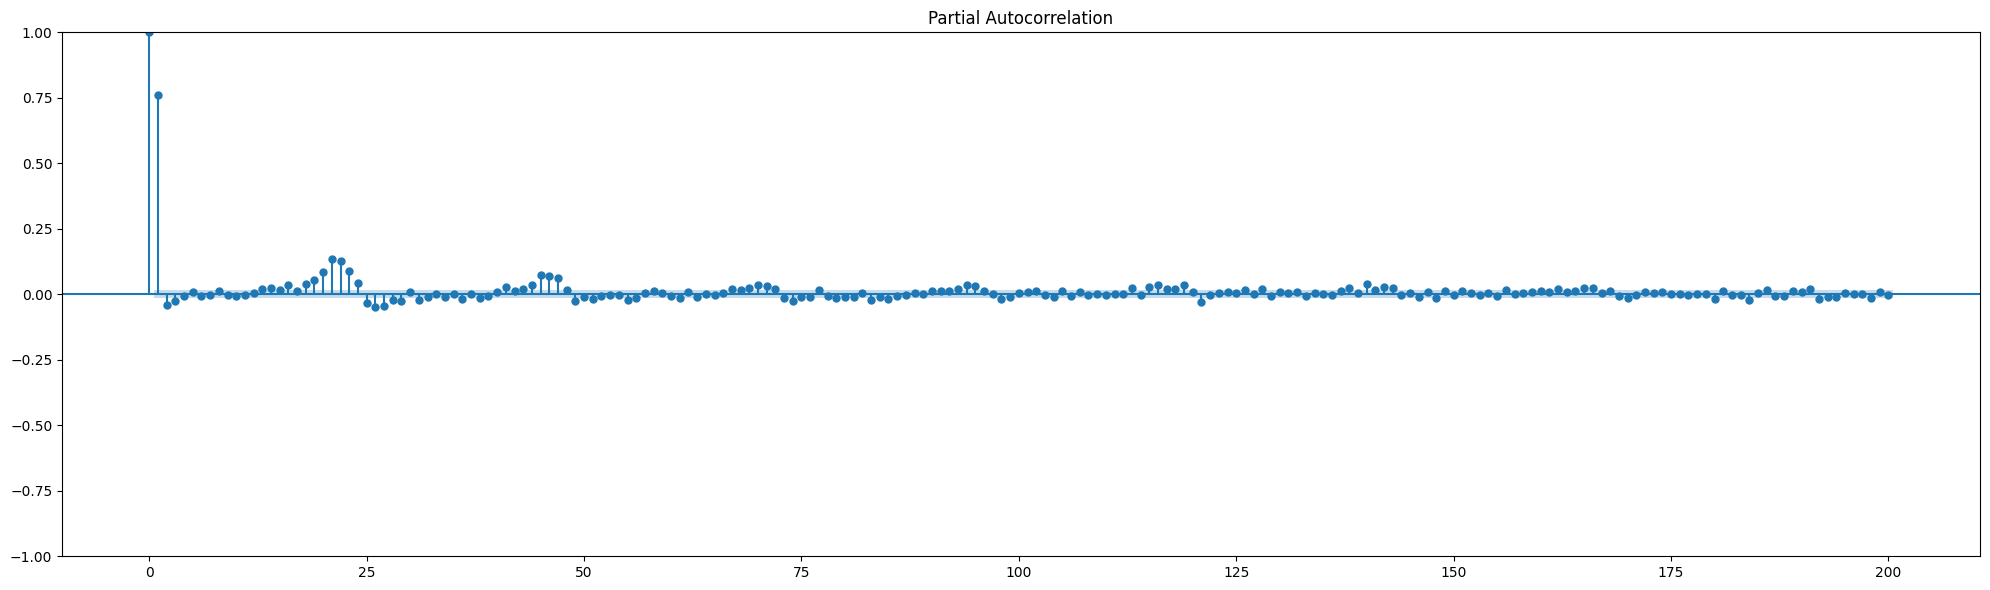

In [46]:
plt.rcParams.update({'figure.figsize': (20, 6)})
plot_pacf(serie_pm10_wna["pm10"], lags=200)
plt.tight_layout()
plt.show()

Y como era de esperarse en la gráfica de la autocorrelacion parcial se ve el mismo patrón que obtuvimos en la primera parte de la serie, vemos que de igual manera las dos primeras correlaciones indican que esta serie esta muy correlacionada con sus dos observaciones inmediatas del pasado.

De igual forma para confirmar, se realiza a continuación la prueba se **Duckey-Fuller**.

In [47]:
result = adfuller(serie_pm10_wna["pm10"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -12.381327
p-value: 0.000000


Mostrando así lo anterior, que la serie de tiempo desde 2020 hasta 2022 es estacionaria tambien ya que se obtuvo un p-valor=0 rechazando la hipotesis nula bajo todos los niveles de significancia.

Según lo anterior tambien es correcto implentar un modelo ARMA, ya que la serie es estacionaria y este modelo es el indicado para llevar a cabo la imputación.

#### **Modelo ARMA para la imputación de datos faltantes**

Hiperparametrización de los parametros p y q para el modelo.

In [48]:
aicVal=[]

for ari in range(1, 4):
    for maj in range(1,4):
        arma_obj = smtsa.ARIMA(serie_pm10_wna["pm10"].tolist(), order=(ari, 0, maj)).fit()
        aicVal.append([ari, maj, arma_obj.aic])

In [49]:
dfAIC = pd.DataFrame(aicVal, columns=['AR(p)', 'MA(q)', 'AIC'])
dfAIC

,AR(p),MA(q),AIC
0,1,1,123168.556707
1,1,2,123159.542566
2,1,3,123160.177872
3,2,1,123160.447828
4,2,2,123160.667079
5,2,3,123161.267903
6,3,1,123160.777776
7,3,2,123162.976077
8,3,3,123162.337380


In [50]:
dfAIC.nsmallest(n=1, columns="AIC")

,AR(p),MA(q),AIC
1,1,2,123159.542566


Este proceso nos arroja que los mejores parametros para ajustar nuestro modelo ARMA es $p=1$ y $q=2$.

**Implementación de la imputación:**

Se tiene el dataset con los valores faltantes que se quieren imputar.

In [51]:
to_imp=serie_pm10.copy()
to_imp

variable,fecha,pm10
0,2020-01-01 00:59:59+00:00,NaN
1,2020-01-01 01:59:59+00:00,NaN
2,2020-01-01 02:59:59+00:00,NaN
3,2020-01-01 03:59:59+00:00,NaN
4,2020-01-01 04:59:59+00:00,NaN
...,...,...
26299,2022-12-31 19:59:59+00:00,NaN
26300,2022-12-31 20:59:59+00:00,NaN
26301,2022-12-31 21:59:59+00:00,NaN
26302,2022-12-31 22:59:59+00:00,NaN


Total de valores que se busca imputar:

In [52]:
to_imp["pm10"].isna().sum()

11158

vemos que el total de valores que se quiere imputar son 11.158 datos.

Se necesita ademas el conjunto de datos para entrenar el modelo, es decir el conjunto de datos sin valores faltantes.

In [53]:
entrenamiento=serie_pm10_wna.copy()
entrenamiento

variable,fecha,pm10
0,2020-01-01 10:59:59+00:00,13.8
1,2020-01-01 11:59:59+00:00,9.4
2,2020-01-01 12:59:59+00:00,11.5
3,2020-01-01 13:59:59+00:00,15.1
4,2020-01-01 14:59:59+00:00,19.6
...,...,...
15141,2022-11-01 05:59:59+00:00,57.7
15142,2022-11-01 06:59:59+00:00,77.5
15143,2022-11-01 07:59:59+00:00,77.2
15144,2022-11-01 08:59:59+00:00,89.4


Según lo anterior, para entrenar el modelo se usarán un total de 15.146 registros.

El siguiente paso es gurdar donde se encuentran los valores faltantes, con el fin de poder hacer la imputación de manera correcta.

In [54]:
missing_indices = to_imp[to_imp['pm10'].isnull()].index
print(len(missing_indices))
missing_indices

11158


Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       26294, 26295, 26296, 26297, 26298, 26299, 26300, 26301, 26302, 26303],
      dtype='int64', length=11158)

#### **Ajustando el modelo.**

In [55]:
arma_obj_finp = smtsa.ARIMA(entrenamiento["pm10"].tolist(), order=(1, 0, 2)).fit()

predicciones = arma_obj_finp.predict(start=0, end=len(to_imp) - 1)

for idx in missing_indices:
    to_imp.at[idx, 'pm10'] = predicciones[idx]

Revisamos que la imputación se haya hecho de la forma correcta.

In [56]:
to_imp["pm10"].isna().sum()

0

Veamos la gráfica de la serie de tiempo desde el 2020 hasta 2022 con la presencia de valores faltantes.

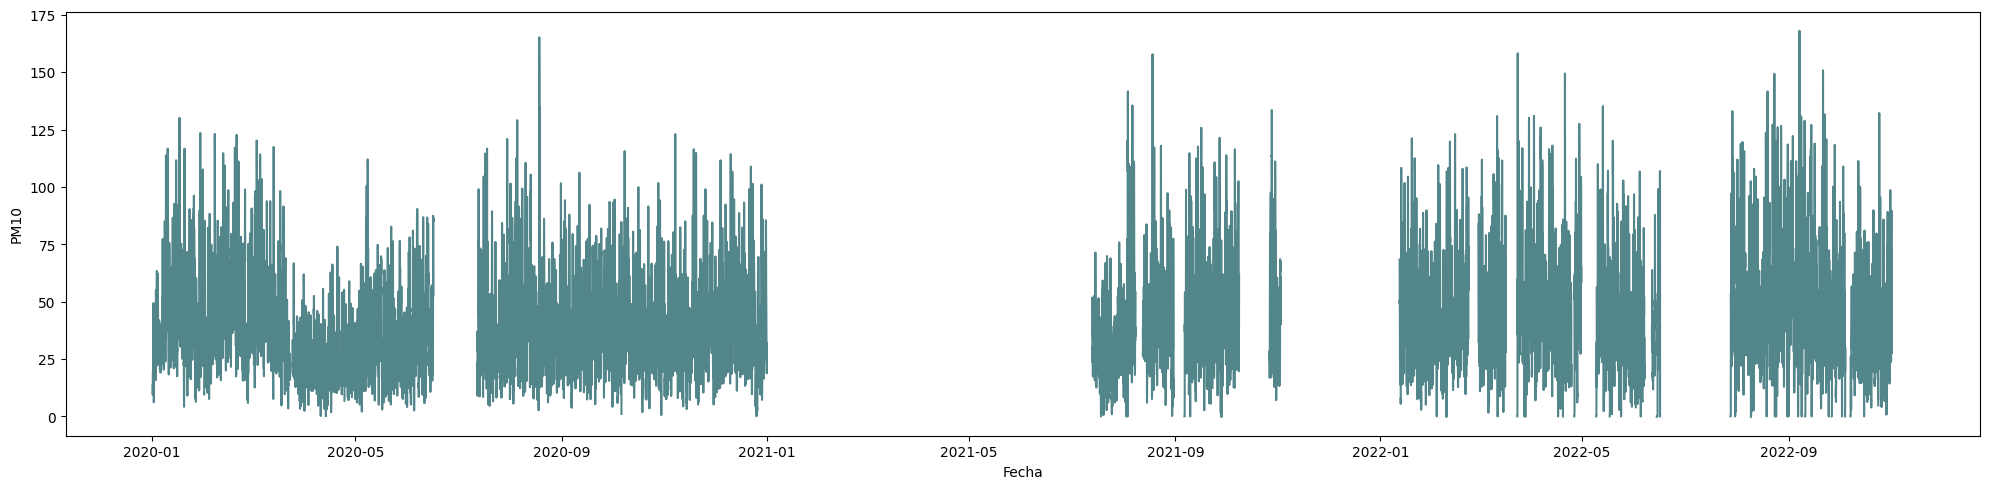

In [57]:
plt.figure(figsize=(20, 5))
plt.plot(serie_pm10['fecha'], serie_pm10['pm10'], color='#53868B',  linestyle='-', markersize=5)
plt.xlabel('Fecha')
plt.ylabel('PM10')
plt.tight_layout()
plt.show()

Y ahora vemos la gráfica con los valores imputados.

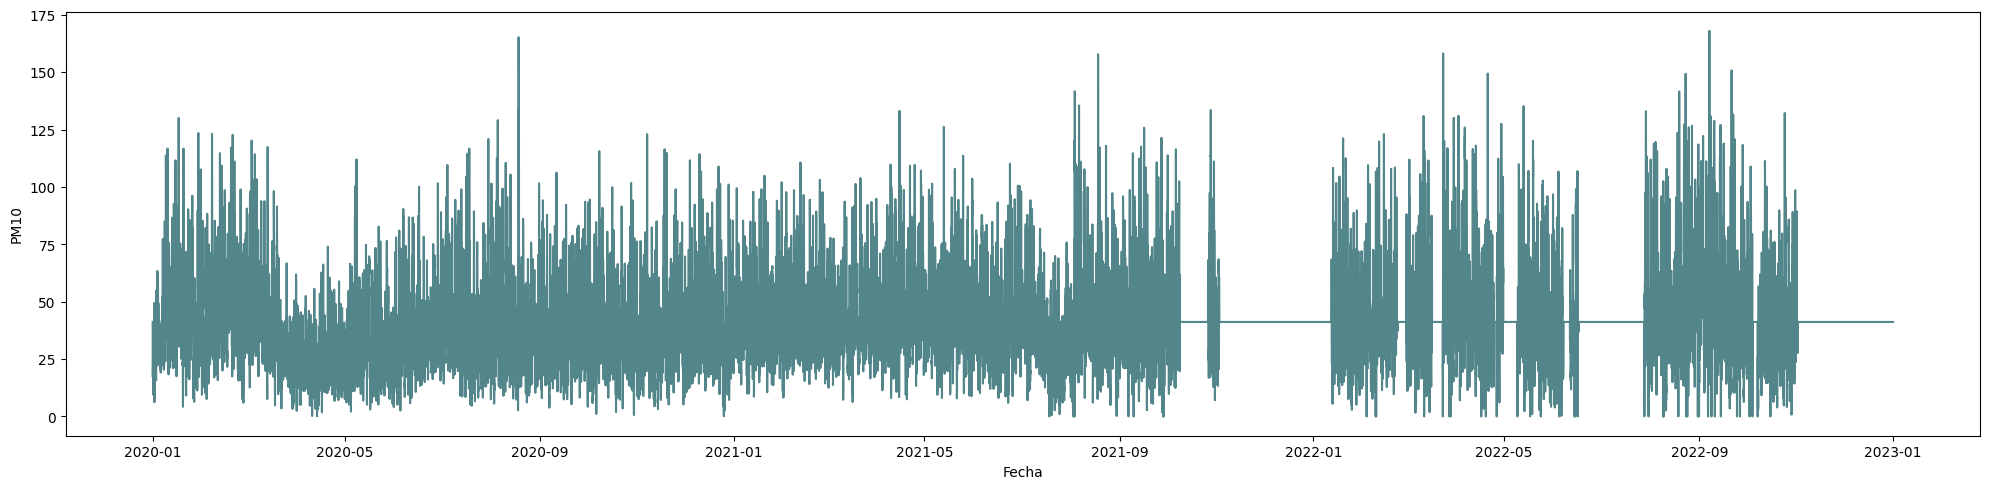

In [58]:
plt.figure(figsize=(20, 5))
plt.plot(to_imp['fecha'], to_imp['pm10'], color='#53868B',  linestyle='-', markersize=5)
plt.xlabel('Fecha')
plt.ylabel('PM10')
plt.tight_layout()
plt.show()

Al terminar con la predicción en los valores faltantes vemos que el modelo logró ajustar los valores faltantes desde enero de 2021 hasta septiembre de 2021, pero de ahí en adelante el modelo empieza a fallar, así que lo mas probable es que el modelo no es el adecuado. De igual manera revisemos como fueron los residuos del modelo.

#### **Revisión de supuestos**

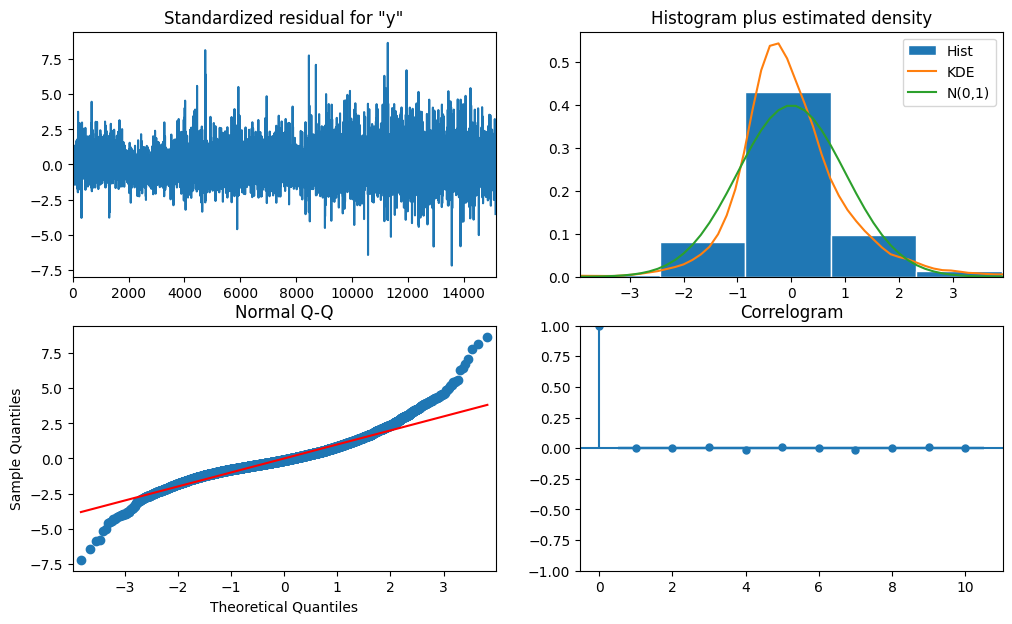

In [59]:
arma_obj_finp.plot_diagnostics(figsize=(12,7))
plt.show()

Si verificamos los supuestos del modelo podemos ver que los residuos al parecer se distribuyen normales y que no parecen tener una correlación entre ellos lo cual es importante, puesto que indica que los errores que existen son aleatorios. Así que no existe aparente causa para la cual el modelo imputar no funcione, así que habría que estudair los datos mas a profundidad.